# Visualizations

## Spectrograms

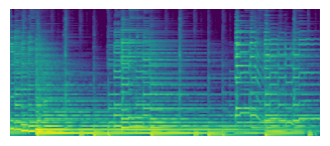

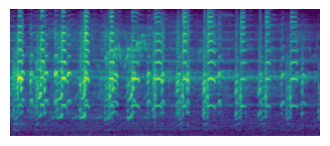

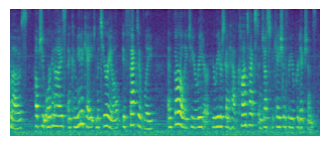

In [29]:
import os
import yt_dlp as youtube_dl
import librosa
import numpy as np
import matplotlib.pyplot as plt

HOME_FOLDER = '/home/user/ss-vq-vae/experiments/visualizations_data/spectrograms/'
SR = 16_000
duration = 10

# Dictionary of YouTube URLs with start and duration for clips
# Clips taken from the Audioset dataset: "Music", "Bird vocalization, bird call, bird song" and "Speech" respectively
rel_paths = {
    'Music': '-0SdAVK79lg.wav',
    'Bird song': 'G8tT-uKj3Ls.wav',
    'Speech': '-5-vmt2iKT0.wav',
}

def process_audio(rel_path):
    full_path = os.path.join(HOME_FOLDER, rel_path)
    
    audio_data, sample_rate = librosa.load(full_path, sr=SR, duration=duration)
    melspectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
    return librosa.power_to_db(melspectrogram, ref=np.max)

melspectrograms = {key: process_audio(rel_path) for key, rel_path in rel_paths.items()}

# Generate plots
for i, (key, melspectrogram) in enumerate(melspectrograms.items()):
    fig, axes = plt.subplots(1, figsize=(4, 12))
    axes.axis('off')
    axes.imshow(melspectrogram, origin='lower')
    fig.savefig(os.path.join(HOME_FOLDER, f"{key}.png"))